1. ĐỌC FILE DỮ LIỆU CSV

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px

df = pd.read_csv('data/filtered_data_northern_vietnam.csv')
df

,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON
0,2013-01-01,VMM00048840,61,54,59,0.00,2013,1,Winter
1,2013-01-04,VMM00048840,59,54,56,0.00,2013,1,Winter
2,2013-01-05,VMM00048840,56,52,54,0.01,2013,1,Winter
3,2013-01-06,VMM00048840,54,52,53,0.05,2013,1,Winter
4,2013-01-07,VMM00048840,57,53,55,0.00,2013,1,Winter
...,...,...,...,...,...,...,...,...,...
7613,2024-09-11,VMM00048806,81,70,73,0.00,2024,9,Autumn
7614,2024-09-12,VMM00048806,82,69,75,0.00,2024,9,Autumn
7615,2024-09-14,VMM00048806,84,70,76,0.00,2024,9,Autumn
7616,2024-09-15,VMM00048806,89,69,79,0.00,2024,9,Autumn


2. CHUYỂN ĐỘ F THÀNH ĐỘ C

In [63]:
df['TMAX'] = round((df['TMAX']-32)/1.8, 1)
df['TMIN'] = round((df['TMIN']-32)/1.8, 1)
df['TAVG'] = round((df['TAVG']-32)/1.8, 1)
df

,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON
0,2013-01-01,VMM00048840,16.1,12.2,15.0,0.00,2013,1,Winter
1,2013-01-04,VMM00048840,15.0,12.2,13.3,0.00,2013,1,Winter
2,2013-01-05,VMM00048840,13.3,11.1,12.2,0.01,2013,1,Winter
3,2013-01-06,VMM00048840,12.2,11.1,11.7,0.05,2013,1,Winter
4,2013-01-07,VMM00048840,13.9,11.7,12.8,0.00,2013,1,Winter
...,...,...,...,...,...,...,...,...,...
7613,2024-09-11,VMM00048806,27.2,21.1,22.8,0.00,2024,9,Autumn
7614,2024-09-12,VMM00048806,27.8,20.6,23.9,0.00,2024,9,Autumn
7615,2024-09-14,VMM00048806,28.9,21.1,24.4,0.00,2024,9,Autumn
7616,2024-09-15,VMM00048806,31.7,20.6,26.1,0.00,2024,9,Autumn


3. KIỂM TRA XEM CÓ DỮ LIỆU NÀO BỊ LỖI KHÔNG 

In [64]:
a = df[(df['TMIN'] > df['TAVG']) & (df['TAVG'] > df['TMAX'])]
a


,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON


In [65]:
df['STATION'].unique() # xem có những khu vực quan sát nào

array(['VMM00048840', 'VMM00048825', 'VMM00048826', 'VMM00048830',
       'VMM00048808', 'VMM00048806'], dtype=object)

In [66]:
# kiểm tra xem có bản ghi nào trùng lặp ko
df[df.duplicated()]

,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON


4. KIỂM TRA PHẠM VI CỦA TAVG,TMAX,TMIN

<Axes: title={'center': 'TAVG'}, xlabel='[STATION]', ylabel='TAVG'>

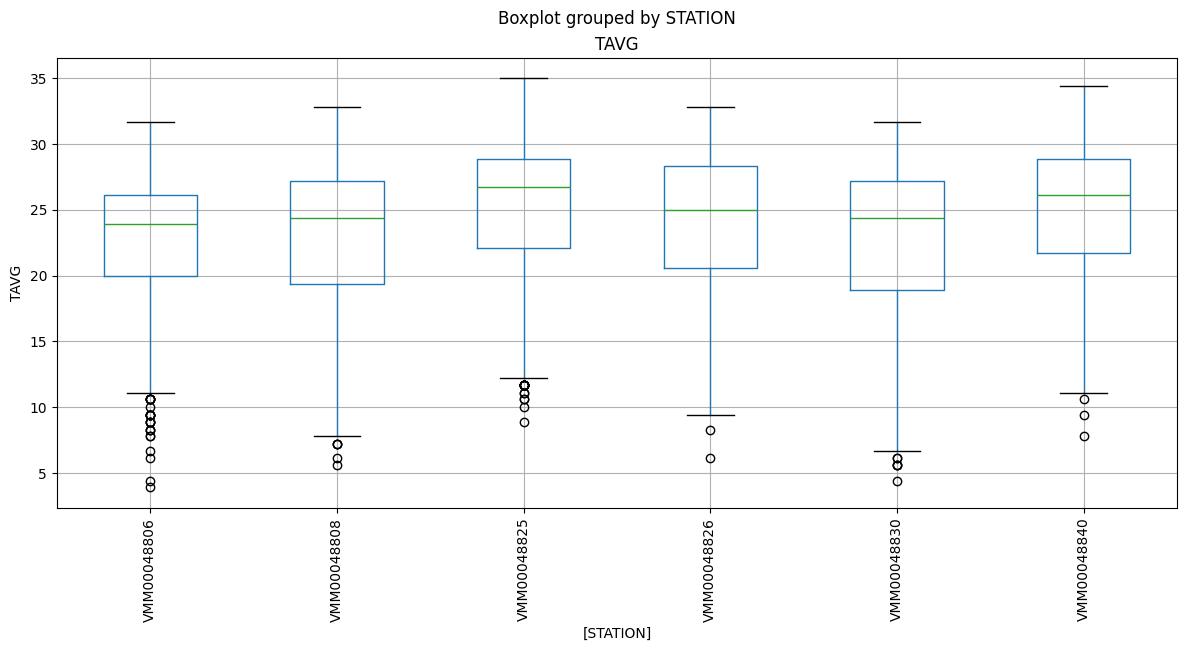

In [67]:
# kiểm tra phạm vi của Tavg
ax = df[['TAVG', 'STATION']].boxplot(by='STATION', figsize=(14, 6))
ax.set_ylabel('TAVG')
plt.xticks(rotation=90)
ax


<Axes: title={'center': 'TMAX'}, xlabel='[STATION]', ylabel='TMAX'>

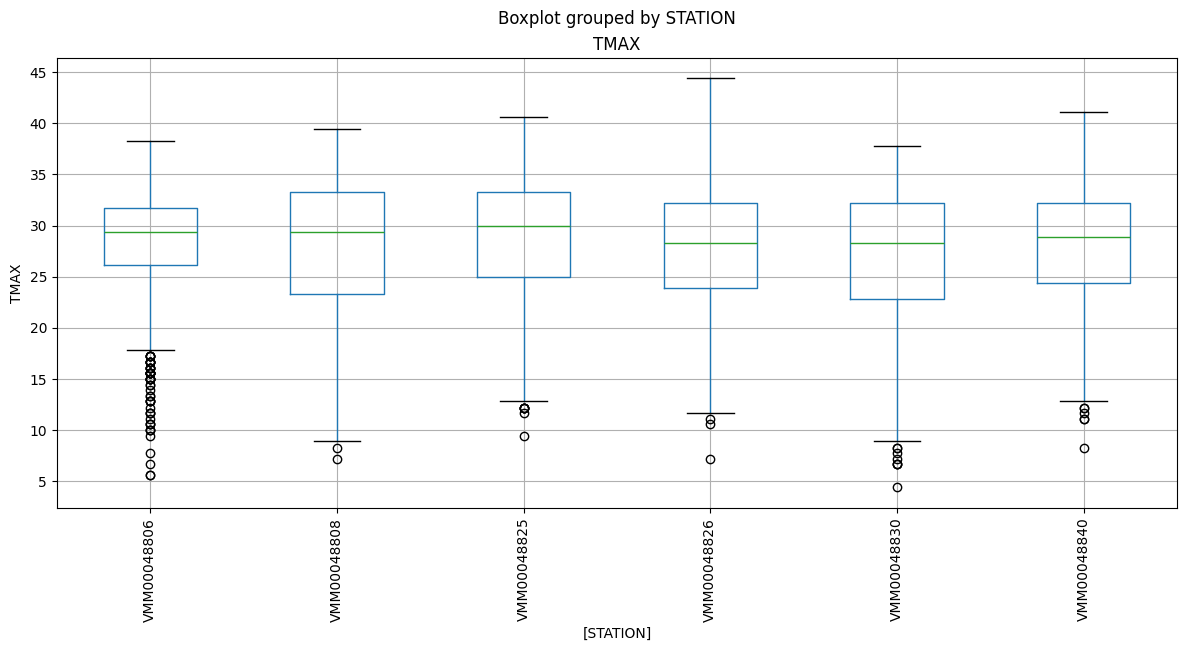

In [68]:
# kiểm tra phạm vi của Tavg
import matplotlib.pyplot as plt
ax = df[['TMAX', 'STATION']].boxplot(by='STATION', figsize=(14, 6))
ax.set_ylabel('TMAX')
plt.xticks(rotation=90)
ax

<Axes: title={'center': 'TMIN'}, xlabel='[STATION]', ylabel='TMIN'>

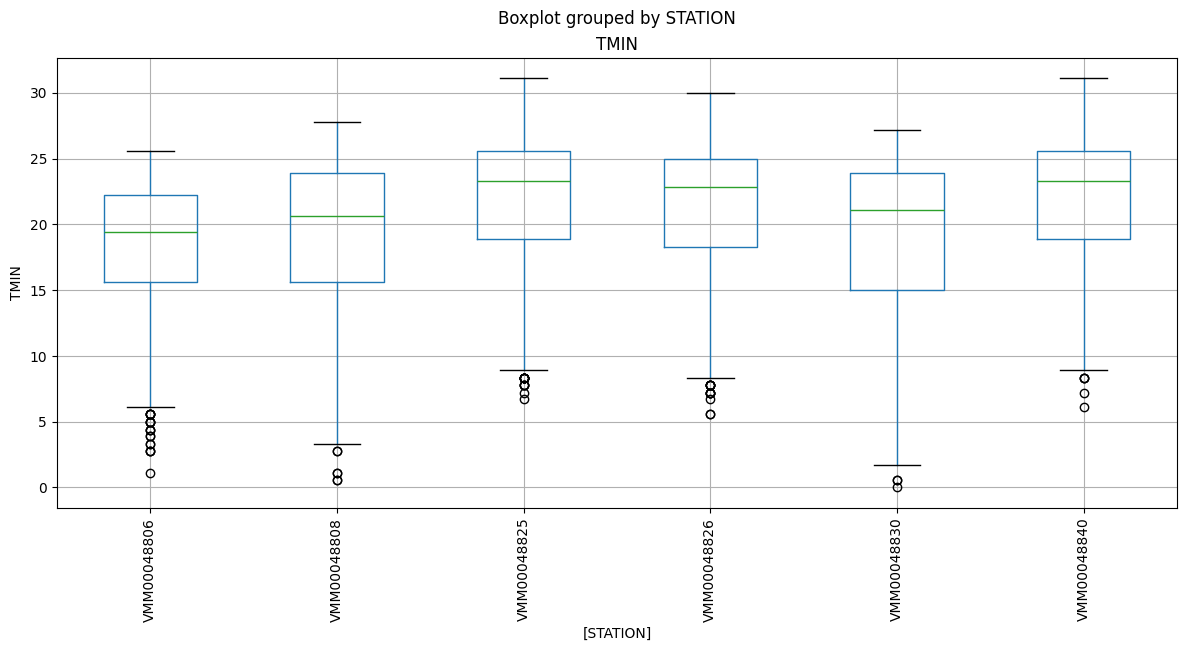

In [69]:
# kiểm tra phạm vi của Tavg
ax = df[['TMIN', 'STATION']].boxplot(by='STATION', figsize=(14, 6))
ax.set_ylabel('TMIN')
plt.xticks(rotation=90)
ax

5. GÁN MÁC CÁC GIÁ TRỊ NGOÀI PHẠM VI

In [70]:
# Tính toán Q1, Q3 và IQR cho từng tỉnh
def calculate_isoutlier(df, column):
    df['ISOUTLIER'] = False  # Khởi tạo cột IsOutlier mặc định là False
    for (station), group in df.groupby('STATION'):
        q1 = group[column].quantile(0.25)
        q3 = group[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = (group[column] < lower_bound) | (group[column] > upper_bound)
        # Lọc các giá trị outlier
        df.loc[(df['STATION'] == station) & outliers, 'ISOUTLIER'] = True
    return df

# Lấy các giá trị outlier cho từng tỉnh
df = calculate_isoutlier(df,'TAVG')
df



,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON,ISOUTLIER
0,2013-01-01,VMM00048840,16.1,12.2,15.0,0.00,2013,1,Winter,False
1,2013-01-04,VMM00048840,15.0,12.2,13.3,0.00,2013,1,Winter,False
2,2013-01-05,VMM00048840,13.3,11.1,12.2,0.01,2013,1,Winter,False
3,2013-01-06,VMM00048840,12.2,11.1,11.7,0.05,2013,1,Winter,False
4,2013-01-07,VMM00048840,13.9,11.7,12.8,0.00,2013,1,Winter,False
...,...,...,...,...,...,...,...,...,...,...
7613,2024-09-11,VMM00048806,27.2,21.1,22.8,0.00,2024,9,Autumn,False
7614,2024-09-12,VMM00048806,27.8,20.6,23.9,0.00,2024,9,Autumn,False
7615,2024-09-14,VMM00048806,28.9,21.1,24.4,0.00,2024,9,Autumn,False
7616,2024-09-15,VMM00048806,31.7,20.6,26.1,0.00,2024,9,Autumn,False


In [71]:
# kiểm tra outlier
df[df['ISOUTLIER']==True]

,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON,ISOUTLIER
269,2014-02-11,VMM00048840,11.1,9.4,10.6,0.04,2014,2,Spring,True
487,2016-01-25,VMM00048840,11.1,6.1,9.4,0.01,2016,1,Winter,True
488,2016-01-26,VMM00048840,8.3,7.2,7.8,1.26,2016,1,Winter,True
1237,2013-01-06,VMM00048825,12.8,8.9,11.7,0.07,2013,1,Winter,True
1238,2013-01-07,VMM00048825,12.2,10.0,11.7,0.02,2013,1,Winter,True
...,...,...,...,...,...,...,...,...,...,...
7284,2022-02-21,VMM00048806,10.0,6.1,7.8,0.00,2022,2,Spring,True
7285,2022-02-23,VMM00048806,12.8,6.1,9.4,0.09,2022,2,Spring,True
7511,2024-01-23,VMM00048806,10.0,7.2,8.3,0.05,2024,1,Winter,True
7512,2024-01-24,VMM00048806,10.6,7.2,8.3,0.00,2024,1,Winter,True


6. NHIỆT ĐỘ TRUNG BÌNH THEO NĂM TRONG PHẠM VI

In [72]:
# temp_avg theo năm
df1 = df[df['ISOUTLIER']==False].groupby('YEAR')['TAVG'].mean().reset_index().round(1)
df1.to_csv('temp_year.csv',index= False)

7. NHIỆT ĐỘ THAY ĐỔI QUA TỪNG NĂM

In [73]:
df1 = pd.read_csv('temp_year.csv')
# tính sự thay đổi nhiệt giữa các năm
df1['TEMP_CHANGE'] = df1['TAVG'].diff().round(1)
# dùng loc để gán giá trị đầu là nan
df1.loc[0,'TEMP_CHANGE'] = np.nan
df1


,YEAR,TAVG,TEMP_CHANGE
0,2013,23.4,NaN
1,2014,23.6,0.2
2,2015,19.3,-4.3
3,2016,26.0,6.7
4,2017,23.4,-2.6
5,2018,23.9,0.5
6,2019,25.6,1.7
7,2020,22.0,-3.6
8,2021,22.7,0.7
9,2022,24.2,1.5


8. NHIỆT ĐỘ MAX, MIN VÀ BIÊN ĐỘ NHIỆT THEO NĂM

In [74]:
# Tính nhiệt độ lớn nhất và nhỏ nhất theo từng năm
temp_max = df.groupby('YEAR')['TMAX'].max().reset_index(name= 'TMAX')
temp_min = df.groupby('YEAR')['TMIN'].min().reset_index(name= 'TMIN')
# Tính biên độ dao động nhiệt theo năm
df1 = df1.merge(temp_max, on='YEAR', how='left')
df1 = df1.merge(temp_min, on='YEAR', how='left')
df1['TEMP_RANGE'] = (df1['TMAX']-df1['TMIN']).round(1)
df1

,YEAR,TAVG,TEMP_CHANGE,TMAX,TMIN,TEMP_RANGE
0,2013,23.4,NaN,39.4,1.1,38.3
1,2014,23.6,0.2,39.4,0.6,38.8
2,2015,19.3,-4.3,40.0,3.3,36.7
3,2016,26.0,6.7,38.9,2.8,36.1
4,2017,23.4,-2.6,38.3,10.0,28.3
5,2018,23.9,0.5,40.0,1.1,38.9
6,2019,25.6,1.7,41.1,0.0,41.1
7,2020,22.0,-3.6,38.9,8.3,30.6
8,2021,22.7,0.7,40.0,3.3,36.7
9,2022,24.2,1.5,44.4,4.4,40.0


9. xác định tần suất xuất hiện nhiệt cực đoan()

In [75]:
# tạo cột tần suất
df_hot = calculate_isoutlier(df,'TMAX')
a = df_hot[df_hot['ISOUTLIER']==True].groupby('YEAR').size().reset_index(name= 'frequency_hot')
# on : nối dựa trên năm, how = 'left' nếu ko có giá trị thoả mãn sẽ gán NaN
df1 = df1.merge(a, on= 'YEAR', how= 'left')
# Kiểm tra giá trị NaN và thay thế nếu cần
df1['frequency_hot'] = df1['frequency_hot'].fillna(0).astype(int)
df_cold = calculate_isoutlier(df, 'TMIN')
b = df_cold[df_cold['ISOUTLIER'] == True].groupby('YEAR').size().reset_index(name='frequency_cold')
df1 = df1.merge(b, on= 'YEAR', how= 'left')
df1['frequency_cold'] = df1['frequency_cold'].fillna(0).astype(int)
df1.to_csv('temp_year.csv',index=False)

In [85]:
# kiểm tra xem có lỗi ko
df_cold[df_cold['ISOUTLIER']==True]

,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON,ISOUTLIER
238,2013-12-20,VMM00048840,17.2,8.3,12.2,0.00,2013,12,Winter,True
255,2014-01-23,VMM00048840,21.1,8.3,15.0,0.00,2014,1,Winter,True
487,2016-01-25,VMM00048840,11.1,6.1,9.4,0.01,2016,1,Winter,True
488,2016-01-26,VMM00048840,8.3,7.2,7.8,1.26,2016,1,Winter,True
917,2022-02-21,VMM00048840,14.4,8.3,12.2,0.17,2022,2,Spring,True
...,...,...,...,...,...,...,...,...,...,...
7107,2019-12-12,VMM00048806,22.8,5.6,13.9,0.00,2019,12,Winter,True
7166,2021-01-10,VMM00048806,7.8,5.6,6.7,0.00,2021,1,Winter,True
7167,2021-01-11,VMM00048806,6.7,5.0,6.1,0.04,2021,1,Winter,True
7168,2021-01-12,VMM00048806,11.7,5.0,8.3,0.02,2021,1,Winter,True


Text(0.5, 1.0, 'nhiệt độ trung bình theo năm')

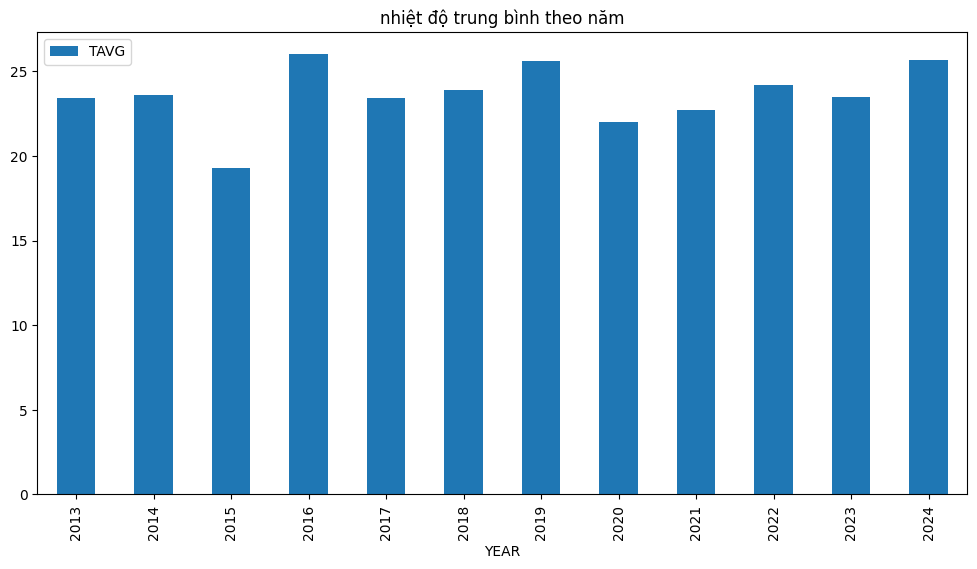

In [86]:
df1.plot(kind= 'bar',x='YEAR',y='TAVG',figsize=(12,6))
plt.title('nhiệt độ trung bình theo năm')

Text(0.5, 1.0, 'nhiệt độ max và min theo năm')

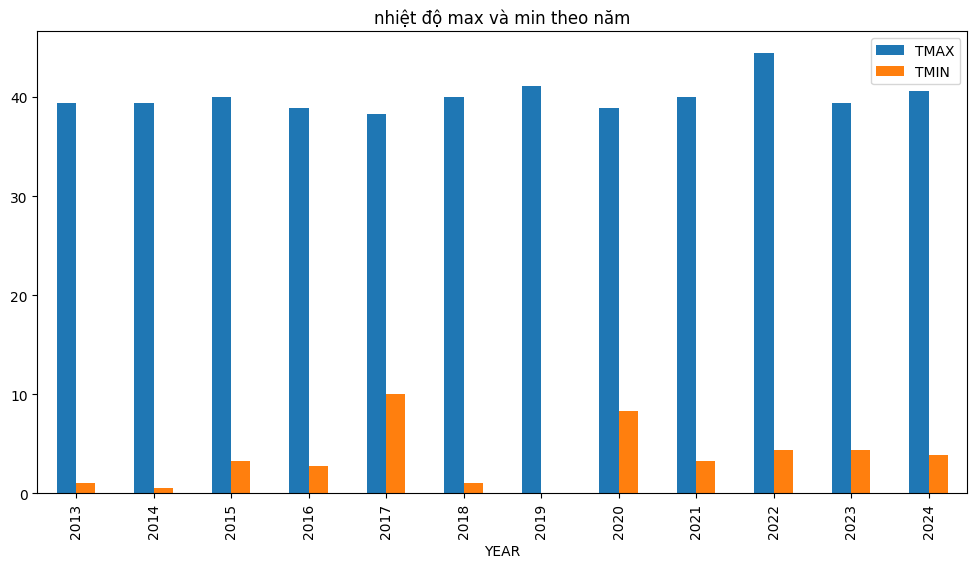

In [87]:
df1.plot(kind = 'bar',x= 'YEAR',y=['TMAX','TMIN'],figsize=(12,6))
plt.title('nhiệt độ max và min theo năm')

<Axes: xlabel='YEAR'>

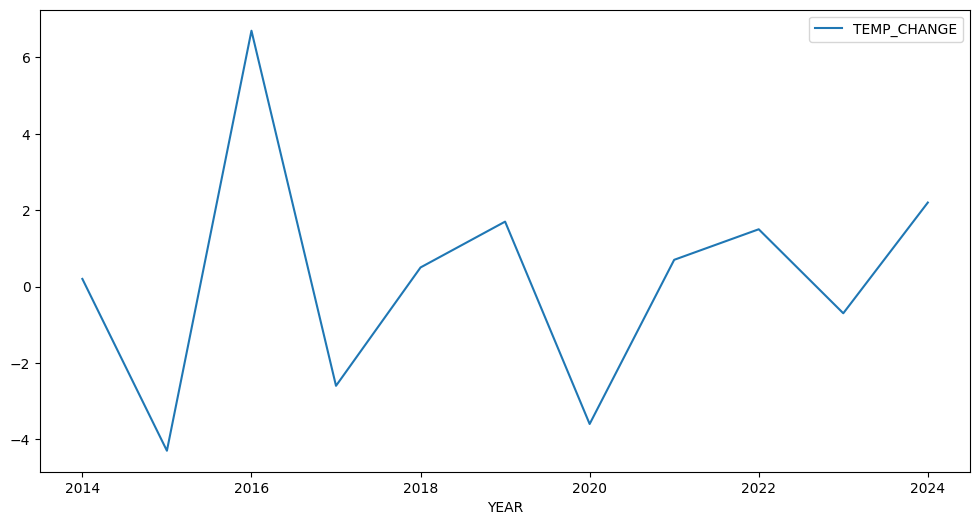

In [89]:
df1.plot(kind='line',x = 'YEAR',y ='TEMP_CHANGE',figsize=(12,6))

C:\Users\Admin\AppData\Local\Temp\ipykernel_15716\860772314.py:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



Text(0.5, 1.0, 'So sánh sự thay đổi về khoảng biên độ nhiệt')

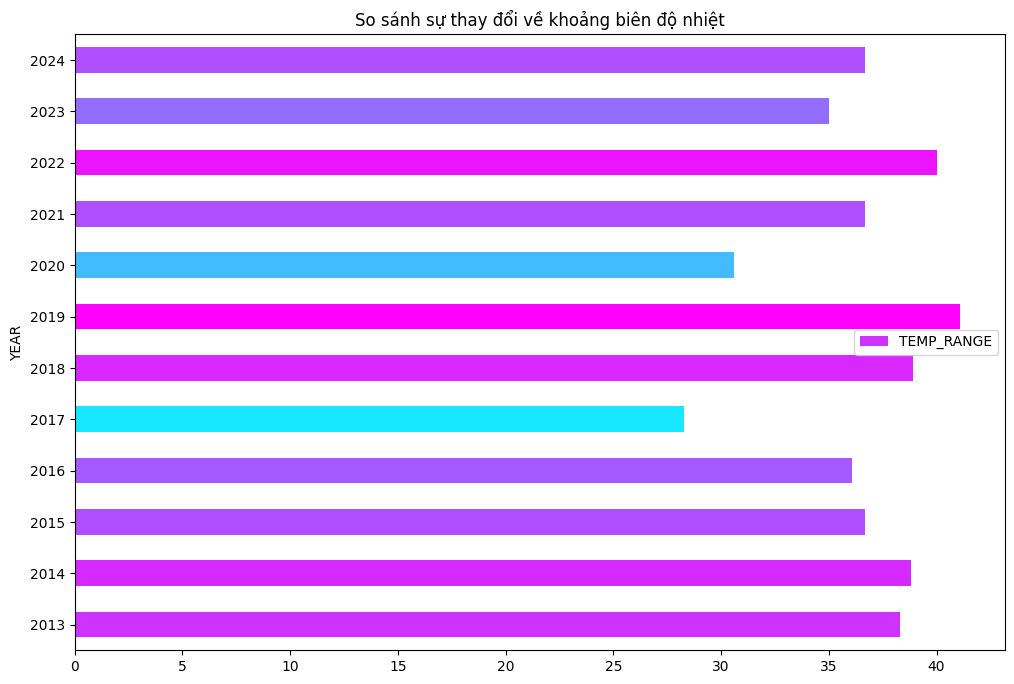

In [90]:
norm_temp_range = (df1['TEMP_RANGE'] - df1['TEMP_RANGE'].min()) / (df1['TEMP_RANGE'].max() - df1['TEMP_RANGE'].min())
norm_temp_range = norm_temp_range * 0.9 + 0.1  # Giới hạn từ 0.1 đến 1

# Lấy colormap 'autumn' và tạo danh sách màu sắc theo giá trị TEMP_RANGE
colormap = cm.get_cmap('cool')
colors = [colormap(value) for value in norm_temp_range]
df1.plot(kind='barh',x = 'YEAR',y = 'TEMP_RANGE',figsize=(12,8),color = colors)
plt.title('So sánh sự thay đổi về khoảng biên độ nhiệt')

In [92]:
fig = px.bar(
    df1,
    x='YEAR',
    y=['frequency_hot', 'frequency_cold'],
    barmode='group',  # Grouped bar chart
    labels={'value': 'Tần số xuất hiện', 'YEAR': 'Năm'},
    title='So sánh tần số nhiệt độ cực đoan theo năm (Hot và Cold)',
    color_discrete_sequence=['salmon', 'skyblue']
)
fig.show()


In [93]:
fig = px.line(
    df1,
    x='YEAR',
    y=['frequency_hot', 'frequency_cold'],
    labels={'value': 'Tần số xuất hiện', 'YEAR': 'Năm'},
    title='Xu hướng tần số nhiệt độ cực đoan theo năm',
    markers=True,
    color_discrete_sequence=['salmon', 'skyblue']
)
fig.show()


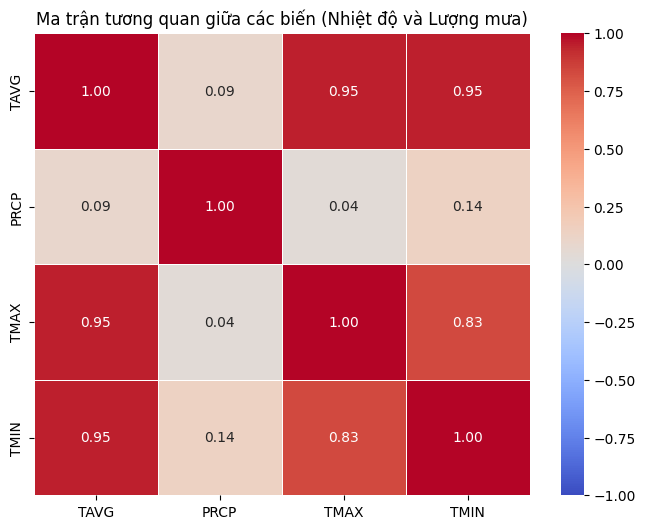

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan giữa các biến
corr_matrix = df[['TAVG', 'PRCP', 'TMAX', 'TMIN']].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các biến (Nhiệt độ và Lượng mưa)')
plt.show()


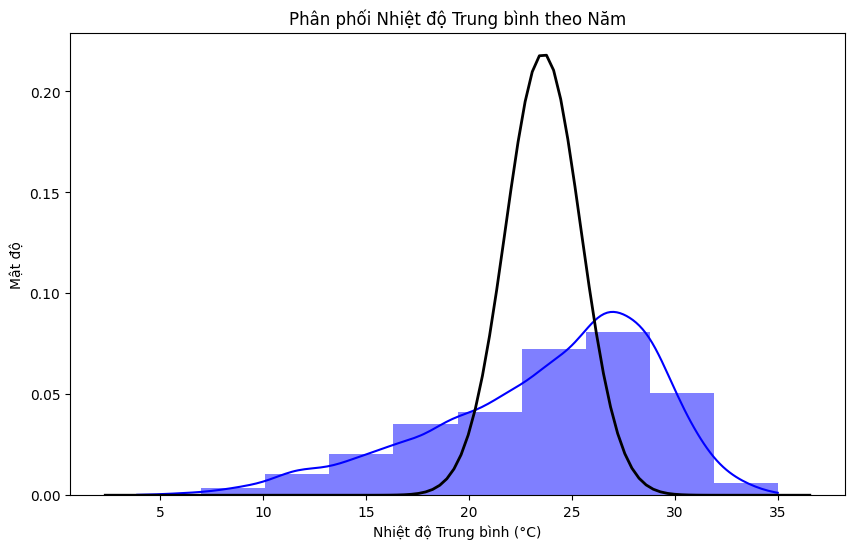

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TAVG'], kde=True, color='blue', bins=10, stat='density', linewidth=0)

# Tính toán các tham số cho phân phối chuẩn (mean và std dev)
mean = df1['TAVG'].mean()
std_dev = df1['TAVG'].std()

# Vẽ đường phân phối chuẩn
xmin, xmax = plt.xlim()  # Lấy phạm vi của trục x
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

# Thêm tiêu đề và nhãn
plt.title('Phân phối Nhiệt độ Trung bình theo Năm')
plt.xlabel('Nhiệt độ Trung bình (°C)')
plt.ylabel('Mật độ')

# Hiển thị đồ thị
plt.show()